In [1]:
from os import listdir
from os.path import isfile, join

import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from scipy.stats import norm

import pickle

In [2]:
pickle_name = 'domain_dataset.pickle'
with open(pickle_name, 'rb') as f:
    dataset = pickle.load(f)


In [3]:
normal_node_fv = [graph.ndata['node_fv'].numpy() for graph, label in dataset if label == 0]
propaganda_node_fv = [graph.ndata['node_fv'].numpy() for graph, label in dataset if label == 1]

all_node_fv = [*normal_node_fv, *propaganda_node_fv]

normal_mean_node_fv = np.vstack([fv.mean(0) for fv in normal_node_fv])
propaganda_mean_node_fv = np.vstack([fv.mean(0) for fv in propaganda_node_fv])
all_mean_node_labels=np.asarray([*[0]*len(normal_mean_node_fv), *[1]*len(propaganda_mean_node_fv)])
all_mean_node_fv = np.vstack([*normal_mean_node_fv, *propaganda_mean_node_fv])

normal_node_fv = np.vstack(normal_node_fv)
propaganda_node_fv = np.vstack(propaganda_node_fv)

all_node_fv = np.vstack(all_node_fv)
all_node_labels = np.asarray([*[0]*len(normal_node_fv), *[1]*len(propaganda_node_fv)])

In [4]:
def plot_pca(title, train, test):
    pca = PCA(n_components=2)
    pca.fit(train)
    plt.figure(figsize=(10, 10))
    plt.title(f'PCA {title}')
    for data, kwargs in test:
        data = pca.transform(data)
        plt.scatter(*data.T, alpha=0.2, s=100, **kwargs)
        
    plt.legend()
    plt.show()

In [5]:
def plot_lda(title, train, labels):
    clf = LinearDiscriminantAnalysis()
    transformed_graphs = clf.fit_transform(train, labels)
    normal = transformed_graphs[labels==0].reshape(-1)
    norm_mean = normal.mean()
    norm_std = normal.std()
    prop = transformed_graphs[labels==1].reshape(-1)
    prop_mean = prop.mean()
    prop_std = prop.std()
    
    color = ["green", "red"]
    marker = ["x", "o"]
    # labels[-1] = 2
    colors = [color[l] for  l in labels]
    plt.figure(figsize=(10, 10))
    plt.title(f'LDA {title}')
    plt.scatter(*transformed_graphs.T, np.zeros(len(transformed_graphs)),  c=colors, alpha=0.5, s=100,marker='2')
    
    linspace = np.linspace(*plt.xlim(), 100)
    norm_distr = norm.pdf(linspace, norm_mean, norm_std)
    prop_distr = norm.pdf(linspace, prop_mean, prop_std)
    plt.plot(linspace, norm_distr, color='green', label='pdf normal ')
    plt.plot(linspace, prop_distr, color='red', label='pdf propaganda')
    plt.ylabel('pdf')
    
    plt.legend()
    plt.show()


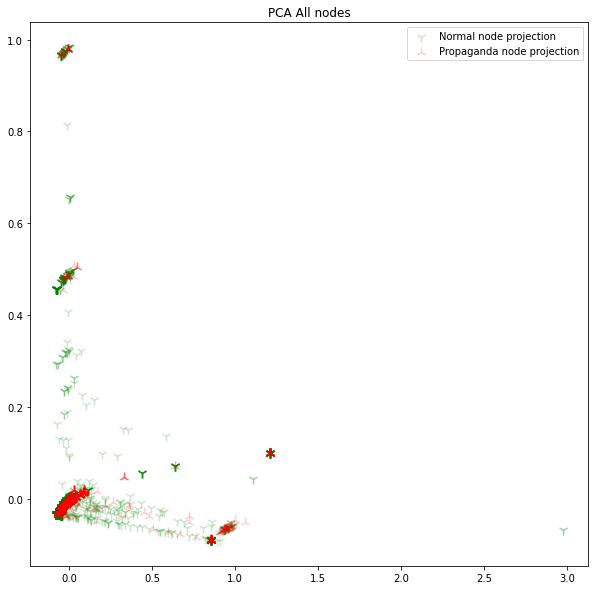

In [6]:
data = [(normal_node_fv, {'c':'green', 'marker':'1', 'label':'Normal node projection'}),
        (propaganda_node_fv, {'c':'red', 'marker':'2', 'label':'Propaganda node projection'})]
plot_pca('All nodes', all_node_fv, data)

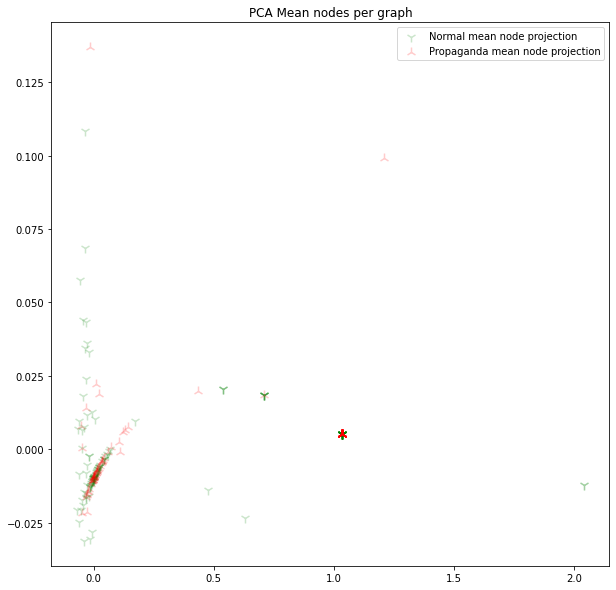

In [7]:
data = [(normal_mean_node_fv, {'c':'green', 'marker':'1', 'label':'Normal mean node projection'}),
        (propaganda_mean_node_fv, {'c':'red', 'marker':'2', 'label':'Propaganda mean node projection'})]
plot_pca('Mean nodes per graph', all_node_fv, data)

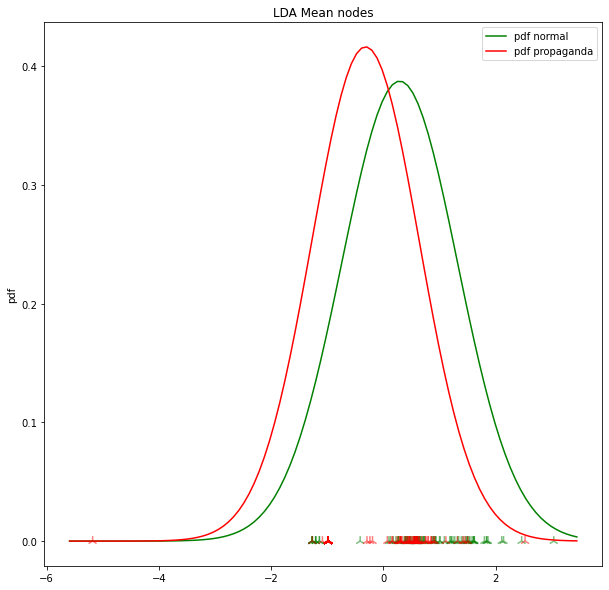

In [8]:
plot_lda("Mean nodes", all_mean_node_fv, all_mean_node_labels)

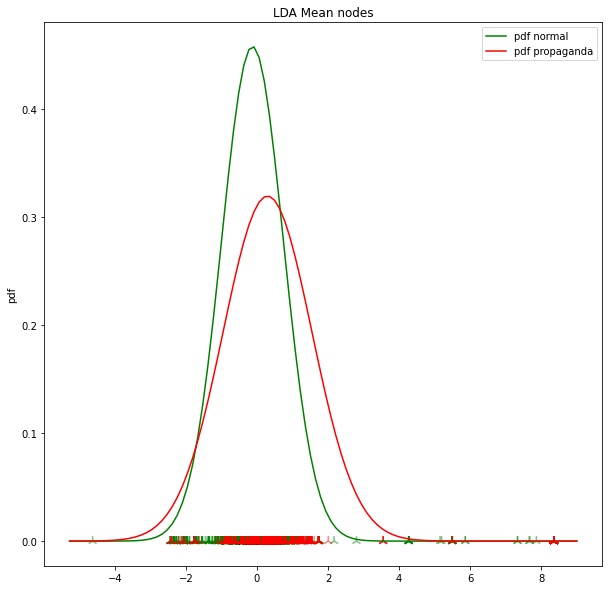

In [9]:
plot_lda("Mean nodes", all_node_fv, all_node_labels)

In [10]:
pickle_name = 'graph_fv_dataset.pickle'
with open(pickle_name, 'rb') as f:
    dataset = pickle.load(f)
fv = np.asarray([fv for fv, _ in  dataset])
labels = np.asarray([l for _,l in dataset])

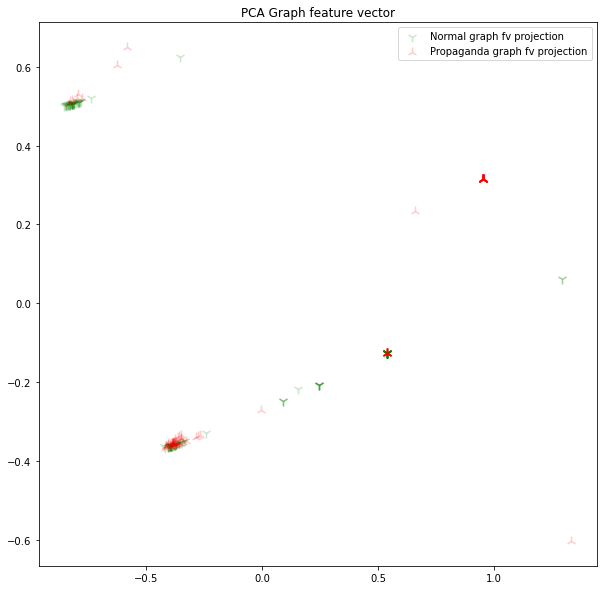

In [15]:
data = [(fv[labels==0], {'c':'green', 'marker':'1', 'label':'Normal graph fv projection'}),
        (fv[labels==1], {'c':'red', 'marker':'2', 'label':'Propaganda graph fv projection'})]
plot_pca('Graph feature vector', fv, data)

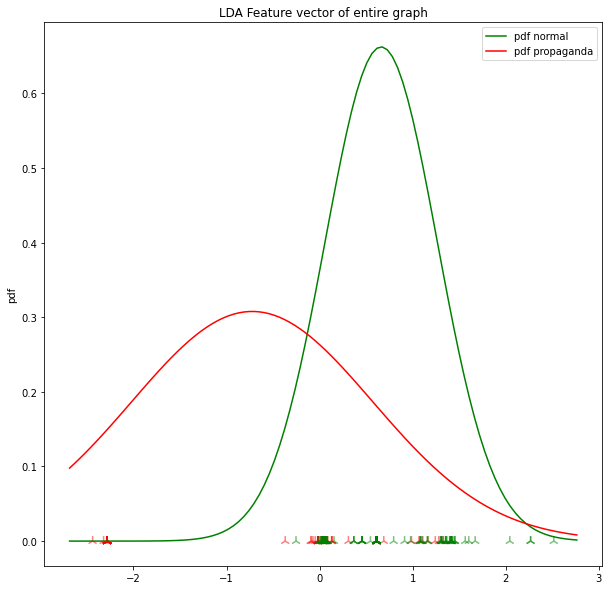

In [12]:

plot_lda('Feature vector of entire graph', fv, labels)